In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0   26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1   40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2   40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3   43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4   36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   

    CCR  FFPG  smoking  drinking  family_histroy  Diabetes  
0  63.8  5.40      3.0       3.0               0         0  
1  70.3  4.10      1.0       1.0               0         0  
2  61.1  4.85      3.0       3.0               0         0  
3  73.4  5.30      2.0       3.0               0         0  
4  67.5  5.53      3.0       3.0               0         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          ----

In [ ]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
X = df_imputed.drop('family_histroy', axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
df_imputed['Cluster'] = kmeans.labels_

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Create a DataFrame with PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_

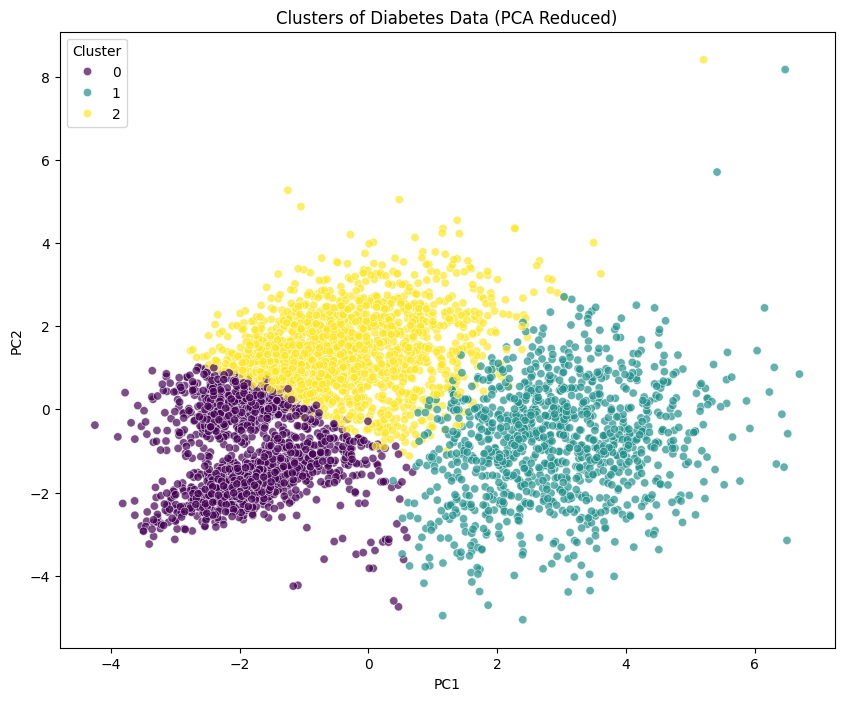

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters of Diabetes Data (PCA Reduced)')
plt.show()